### Module 2: spacetime

### Importation des librairies.

In [1246]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [1247]:
from sympy import init_printing
init_printing()

In [1248]:
from sympy.utilities.lambdify import lambdify


### Partie A:

### Déclaration: des constantes, des conditions initiales, des conditions aux bords.

In [1249]:
##constantes:
nx = 51   
dx = 11/(nx-1)    
dt = .001           # en heure
L =11               # en km
vmax=80             # en km/h
rhomax=250          # voitures par km 

##conditions initiales:
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50

##conditions aux bords:
rho0[0]=10



### Vérification des données initiales.

In [1250]:
print(x)
print(rho0)

[  0.     0.22   0.44   0.66   0.88   1.1    1.32   1.54   1.76   1.98
   2.2    2.42   2.64   2.86   3.08   3.3    3.52   3.74   3.96   4.18
   4.4    4.62   4.84   5.06   5.28   5.5    5.72   5.94   6.16   6.38
   6.6    6.82   7.04   7.26   7.48   7.7    7.92   8.14   8.36   8.58
   8.8    9.02   9.24   9.46   9.68   9.9   10.12  10.34  10.56  10.78  11.  ]
[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.]


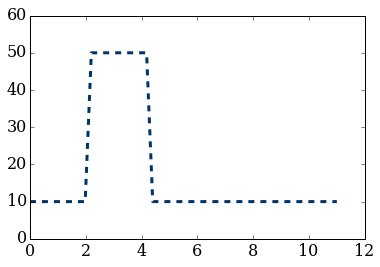

In [1251]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

### Définition des variables symboliques.

In [1252]:
nt,t= sympy.symbols('nt t')
r,s,V= sympy.symbols('r s V')
rho= sympy.symbols('rho')

### Calcul de "nt" par rapport au "t" donné.

In [1253]:
nt=(t/(dt*60))+1  # le coefficient 60 est pour convertir les heures en minutes


In [1254]:
nt_lamb = lambdify((t), nt)        # valeur exacte de "nt"
print(format(nt_lamb(t)))

16.6666666666667*t + 1


### Définition d'une fonction pour calculer: vitesse moyenne et vitesse minimum.

In [1255]:
def v(t):
    for n in range(0,int(nt_lamb(t))):
        un = rho0.copy() 
        rho0[1:] = un[1:]+2*vmax*dt/rhomax*dx*un[1:]*(un[1:]-un[0:-1])-vmax*dt/dx*(un[1:]-un[0:-1])
        if n==int(nt_lamb(t))-1:
            print("Densités :",rho0[0:])
            v=vmax*(1-rho/rhomax)*1000/3600
            v_lamb = lambdify((rho), v)
            print("Vitesses :",format(v_lamb(rho0[0:])))
            v_min=min(v_lamb(rho0[0:]))
            print("Vitesse minimum :",v_min)
            s=sum(v_lamb(rho0[0:]))
            v_moy=s/int(nt_lamb(t))   
            print("Vitesse moyenne :",v_moy)
            
                
            

In [1256]:
v(6)

Densités : [ 10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.00000001
  10.00000006  10.00000031  10.00000134  10.00000537  10.00001978
  10.00006728  10.00021247  10.0006253   10.00172105  10.00444391
  10.01079522  10.02473495  10.05358345  10.10998602  10.21434355
  10.39734551  10.70190093  11.18344493  11.90745484  12.94321224
  14.35351166  16.18112023  18.43410931  21.07328412  24.00531997
  27.0844999   30.12414308  32.91641124  35.2570116   36.97015998
  37.92936321]
Vitesses : [ 21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333331  21.33333321  21.33333286  21

In [1257]:
v(3)

Densités : [ 10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.00000001  10.00000002  10.00000008
  10.00000028  10.00000086  10.00000258  10.00000733  10.00001994
  10.00005194  10.00012975  10.00031116  10.00071716  10.00159027
  10.00339614  10.00699151  10.01388739  10.02663841  10.04938452
  10.08855435  10.15370637  10.25843337]
Vitesses : [ 21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33

### Partie B:

### Déclaration: des constantes, des conditions initiales et des conditions aux bords. (qui ne sont pas les memes que la partie A)

In [1258]:
##prarametres constantes

vmax1=136

##condition initial

rho1 = numpy.ones(nx)*20
rho1[10:20] = 50

##condition au bord
rho1[0]=20



### Vérification des données initiales.

In [1259]:
print(x)
print(rho1)

[  0.     0.22   0.44   0.66   0.88   1.1    1.32   1.54   1.76   1.98
   2.2    2.42   2.64   2.86   3.08   3.3    3.52   3.74   3.96   4.18
   4.4    4.62   4.84   5.06   5.28   5.5    5.72   5.94   6.16   6.38
   6.6    6.82   7.04   7.26   7.48   7.7    7.92   8.14   8.36   8.58
   8.8    9.02   9.24   9.46   9.68   9.9   10.12  10.34  10.56  10.78  11.  ]
[ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.]


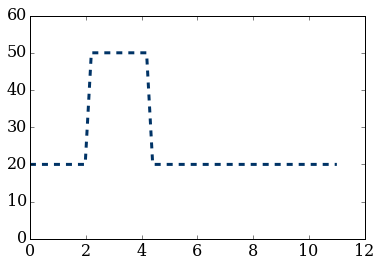

In [1260]:
pyplot.plot(x, rho1, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

In [1261]:
nt1= sympy.symbols('nt1')
r1,s1,V1= sympy.symbols('r1 s1 V1')

In [1262]:
nt1=(t/(dt*60))+1  # le coefficient 60 est pour convertir les heures en minutes


In [1263]:
nt1_lamb = lambdify((t), nt1)        # valeur exacte de "nt"
print(format(nt_lamb(t)))

16.6666666666667*t + 1


In [1264]:
def v1(t):
    for n in range(0,int(nt1_lamb(t))):
        un1 = rho1.copy() 
        rho1[1:] = un1[1:]+2*vmax1*dt/rhomax*dx*un1[1:]*(un1[1:]-un1[0:-1])-vmax1*dt/dx*(un1[1:]-un1[0:-1])
        if n==int(nt1_lamb(t))-1:
            print("Densités :",rho1[0:])
            v1=vmax1*(1-rho/rhomax)*1000/3600
            v1_lamb = lambdify((rho), v1)
            print("Vitesses :",format(v1_lamb(rho1[0:])))
            v1_min=min(v1_lamb(rho1[0:]))
            print("Vitesse minimum :",v1_min)
            s1=sum(v1_lamb(rho1[0:]))
            v1_moy=s1/int(nt1_lamb(t))   
            print("Vitesse moyenne :",v1_moy)
            

### vitesse minimum pour t=0 min.

In [1265]:
v1(0)

Densités : [ 20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.          31.81358545  50.          50.          50.
  50.          50.          50.          50.          50.          50.
  38.40183855  20.          20.          20.          20.          20.          20.
  20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.        ]
Vitesses : [ 34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  32.97039153  30.22222222  30.22222222  30.22222222  30.22222222
  30.22222222  30.22222222  30.22222222  30.22222222  30.22222222
  31.97483329  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.7

### vitesse moyenne et minimum pour t=3 min.

In [1266]:
v1(3)

Densités : [ 20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.          20.          20.          20.
  20.00000002  20.00000012  20.00000069  20.00000345  20.00001565
  20.00006474  20.0002451   20.00085196  20.00272712  20.0080606
  20.02205135  20.05595354  20.13193948  20.28962222  20.59277505
  21.13288752  22.02451812  23.3874991   25.31458529  27.83042344
  30.85604493  34.19672231  37.56466466  40.63243899  43.09726861
  44.7318039   45.40706552  45.09008576  43.83003933  41.74589717
  39.01903816]
Vitesses : [ 34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555555  34.75555554  34.75555545  34.75555503  34.75555319